# Who survived the titanic?

Chris Flores

Amber Beebe

Sean Wilson

Agustin Garcia



In [ ]:
# using the Kaggle Titanic data set found here
# https://www.kaggle.com/c/titanic/data
# 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz ,plot_tree

# no need to split data since kaggle gave us split
test = pd.read_csv("https://raw.githubusercontent.com/flores58c/CST_383_Titanic_Project/main/test.csv")
train = pd.read_csv("https://raw.githubusercontent.com/flores58c/CST_383_Titanic_Project/main/train.csv")

In [ ]:
train.info()
train.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<bound method NDFrame.describe of      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]>

# Predictions
We will be predicting survivability based on categorical data of Pclass, Sex, Age. We will use machine learning methods of knn and or linear regression.


# Data Wrangling

In [ ]:
#find null/na values
train.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Initial preprocessing and cleaning
# we can remove cabin column too much NaN values
train.drop("Cabin",axis=1)
#not sure if we should replace some nan columns in age with mean values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
#changing Sex column to binary 1=male 0=female
le = LabelEncoder()

train["Sex"]=le.fit_transform(train["Sex"])


In [ ]:
#Taking average,  rounded age of only males in data. Will possibly import to N/A values for male ages.
male_age = train['Sex'] == 1
mean_for_male_age = np.round(train.loc[male_age, 'Age'].mean())

mean_for_male_age


31.0

In [ ]:
#Taking average, rounded age of only females in data. Will possibly import to N/A values for female ages.
female_age = train['Sex'] == 0
mean_for_female_age = np.round(train.loc[female_age, 'Age'].mean())
mean_for_female_age


28.0

In [ ]:
train.loc[(train.Age.isnull()) & (train.Sex==0),'Age']= mean_for_female_age

train.loc[(train.Age.isnull()) & (train.Sex==1),'Age']= mean_for_male_age

#check if columns filled
train["Age"].isnull().sum()


0

# Data Exploration

In [ ]:
# data discovery
# Survived: 0 = No, 1 = Yes
test.size == train.size
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


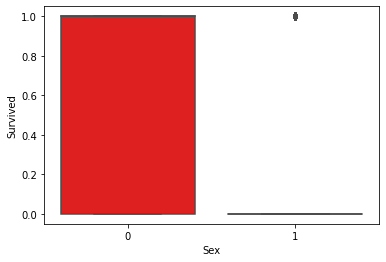

In [ ]:
#boxplot of men and women who survived
sns.boxplot('Sex', 'Survived', data=train, color="red")

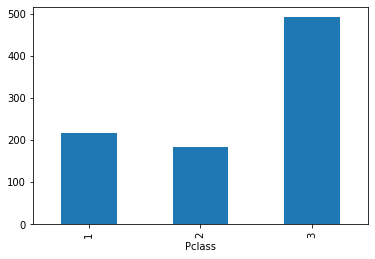

In [ ]:
# The dimensions we will be using are Survived, Sex, Pclass, & Age
# the largest number of passengers were in third class
train.groupby('Pclass').size().plot.bar()

In [ ]:
# More people died than survived
# what was the percentage of people who died vs. survived
# train[(train.Survived == 0)]
# train['Survived'].size OR len(train)
perc_died = round(train[(train.Survived == 0)]['Survived'].size / len(train), 2)
perc_survived = round(train[(train.Survived == 1)]['Survived'].size / len(train), 2)
print("Percentage Survived: " + str(perc_survived) + "%\nPercentage Died: " + str(perc_died) + "%")
# train.groupby('Survived').size().plot.bar()

Percentage Survived: 0.38%
Percentage Died: 0.62%


In [ ]:
pd.crosstab(train.Survived, train.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


In [ ]:
pd.crosstab(train.Survived, train.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


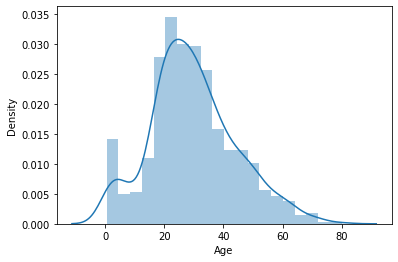

In [ ]:
# What is the distribution of ages
import seaborn as sns
sns.distplot(train.Age)

In [ ]:
# Find conditional probability of people under and over 30 who survived
# Under 30: Yes OR No
# train["over_30"] = None
# del train["over_30"]
# train.head
train["Over30"] = None
train.loc[(train.Age <= 30), 'over_30'] = 'yes'
train.loc[(train.Age > 30), 'over_30'] = 'no'
pd.crosstab(train.Survived, train.over_30)
#maybe change yes/no to 1/0

over_30,no,yes
Survived,,
0,181,243
1,124,166


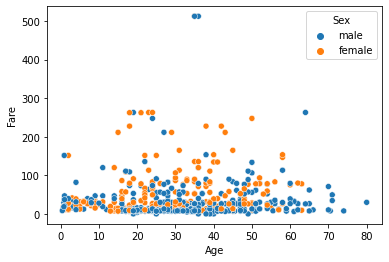

In [ ]:
# Did men pay more for their fare than women, did older passengers pay less than younger passengers?
#sns.scatterplot(data = train, x = "Age", y = "Fare", hue = "Pclass")
sns.scatterplot(data = train, x = "Age", y = "Fare", hue = "Sex")

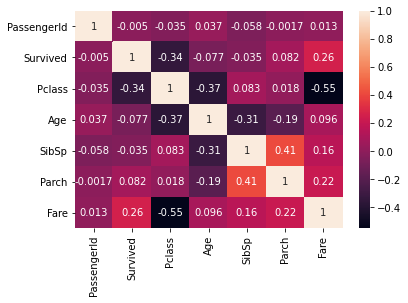

In [ ]:
corM = train.corr()

sns.heatmap(corM, annot = True)
plt.show()

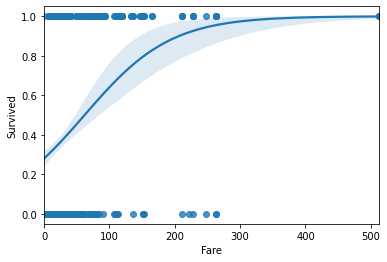

In [ ]:
sns.regplot(x="Fare",y="Survived",data=train,logistic=True)


Paying more had a somewhat positive correlation. Not sure if that's the only reason.

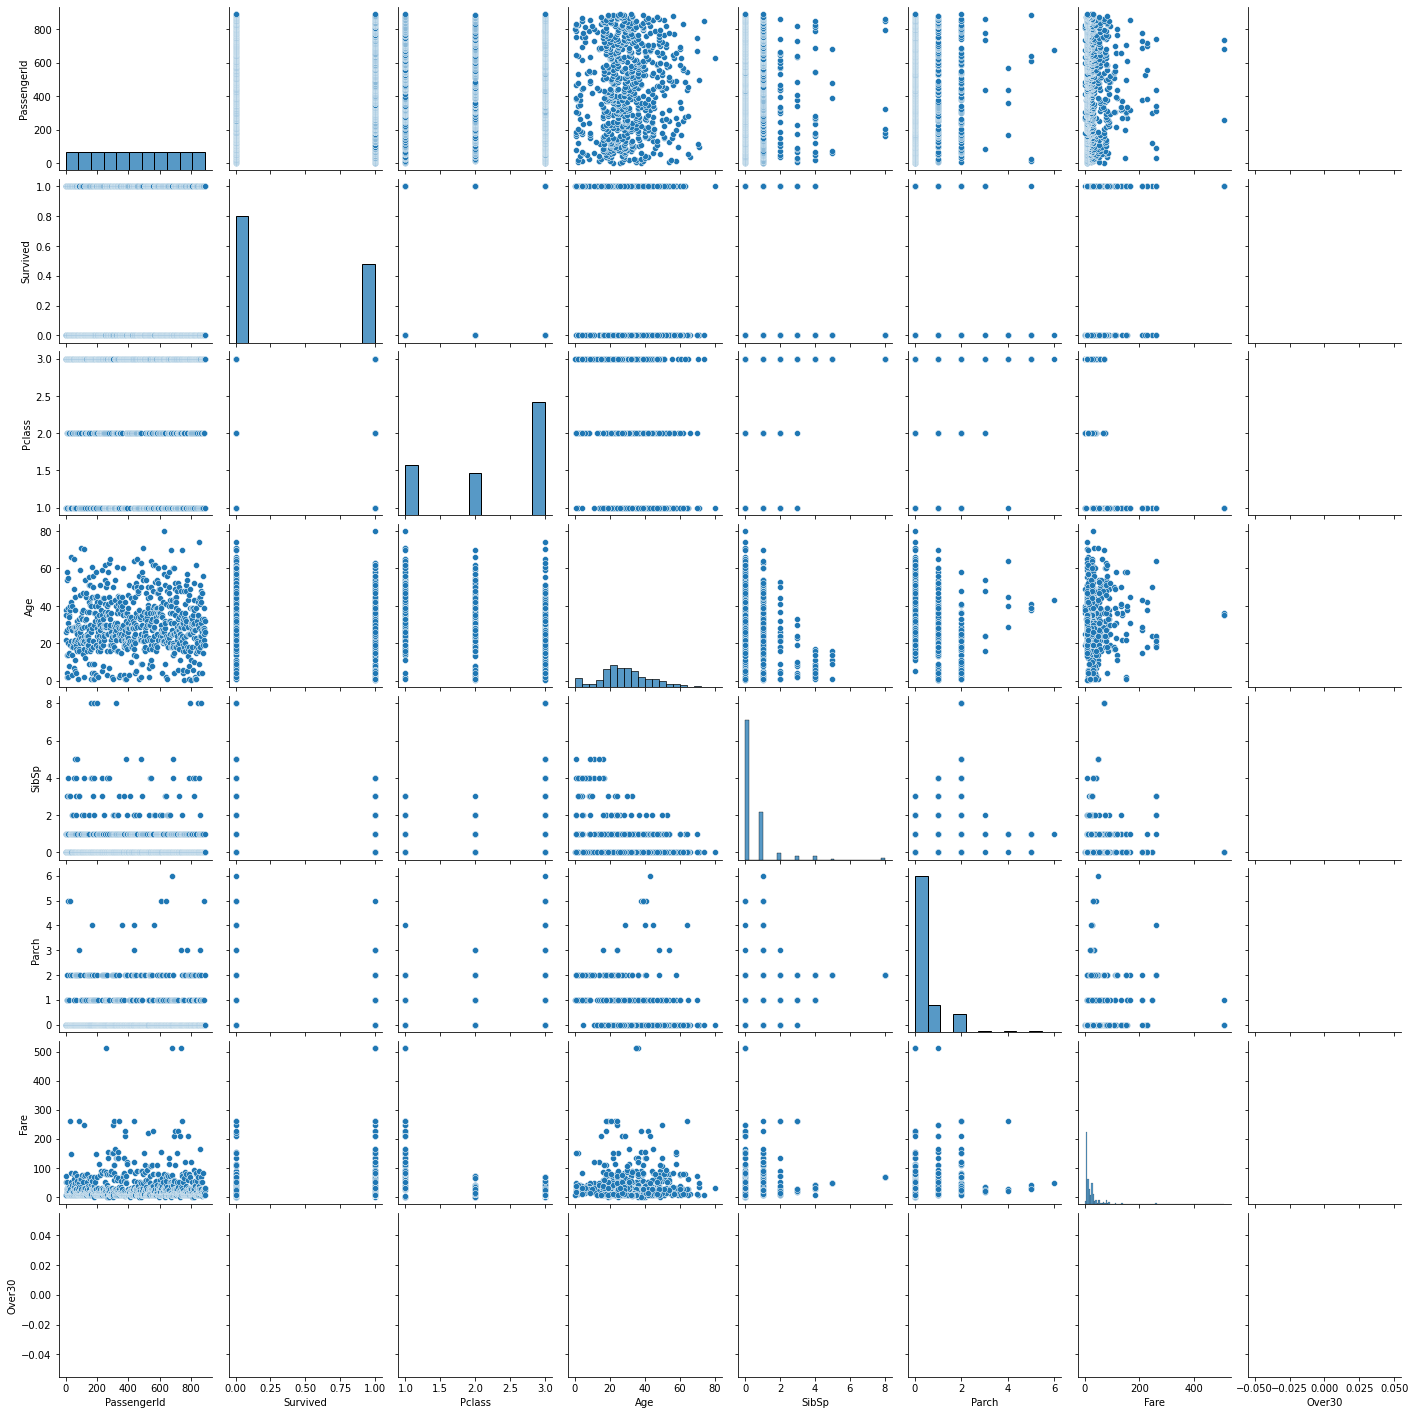

In [ ]:
#grid of scatterplots
sns.pairplot(train)

# Machine Learning 

In [ ]:
predictors = ['Age']
target = 'Survived'
X = train[predictors].values
y = train[target].values
#test.csv unsusable and has no Survived data. Needed to split train.csv
X_train ,X_test, y_train,y_test = train_test_split(X,y,test_size =.8,random_state = 42)
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

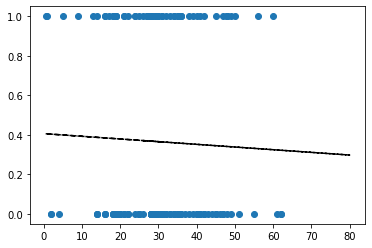

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_test,reg.predict(X_test),linestyle='dashed',color = 'black')

Linear Regression does not give a great representation of the data but shows the trend that the older the passenger is the less likely they will survive.


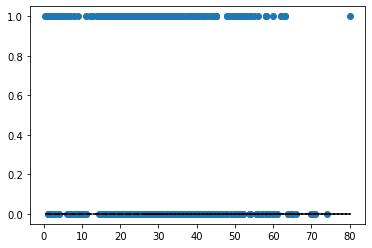

In [ ]:
log = LogisticRegression()
log.fit(X_train,y_train)

plt.scatter(X_test,y_test)
plt.plot(X_test,log.predict(X_test),linestyle='dashed',color = 'black')

Using predicting on the test set with logistic regression which is a classifier alogrithm. We can see that all the people were most likely to die. 

''

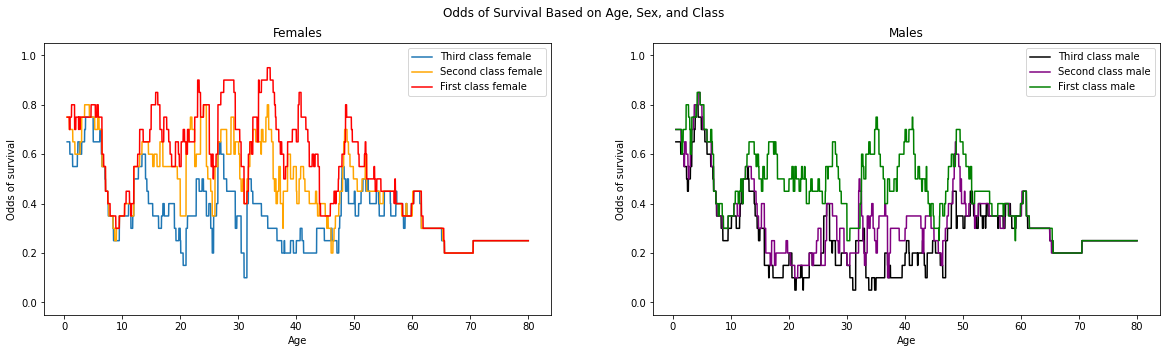

In [ ]:
# Predicting odds of survival based on age, class, and sex, with KNN Regression.

#use this line if you haven't used it elsewhere
train['Sex'] = pd.get_dummies(train['Sex'], drop_first = True)

predictors = ['Age','Sex','Pclass']
target = 'Survived'
X = train[predictors].values
y = train[target].values

from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=20)
reg.fit(X,y)

i = np.linspace(start=.5, stop = 80, num=3000)
plot_f_3 = pd.DataFrame(i, columns=['Age'])
plot_f_3['Sex'] = 0
plot_f_3['Pclass'] = 3
plot_f_2 = pd.DataFrame(i, columns=['Age'])
plot_f_2['Sex'] = 0
plot_f_2['Pclass'] = 2
plot_f_1 = pd.DataFrame(i, columns=['Age'])
plot_f_1['Sex'] = 0
plot_f_1['Pclass'] = 1

plot_m_3 = pd.DataFrame(i, columns=['Age'])
plot_m_3['Sex'] = 1
plot_m_3['Pclass'] = 3
plot_m_2 = pd.DataFrame(i, columns=['Age'])
plot_m_2['Sex'] = 1
plot_m_2['Pclass'] = 2
plot_m_1 = pd.DataFrame(i, columns=['Age'])
plot_m_1['Sex'] = 1
plot_m_1['Pclass'] = 1

fig = plt.figure(figsize=(20, 5))
plt1= fig.add_subplot(121, sharey = plt2)
plt2= fig.add_subplot(122, sharey = plt1)

fig.suptitle('Odds of Survival Based on Age, Sex, and Class')
plt1.plot(i, reg.predict(plot_f_3), label='Third class female')
plt1.plot(i, reg.predict(plot_f_2) , color='orange', label='Second class female')
plt1.plot(i, reg.predict(plot_f_1) , color='red', label='First class female')
plt2.plot(i, reg.predict(plot_m_3), label='Third class male', color='black')
plt2.plot(i, reg.predict(plot_m_2) , color='purple', label='Second class male')
plt2.plot(i, reg.predict(plot_m_1) , color='green', label='First class male')
plt1.legend()
plt2.legend()
plt1.set_xlabel('Age')
plt1.set_ylabel('Odds of survival')
plt2.set_xlabel('Age')
plt2.set_ylabel('Odds of survival')
plt1.set_title('Females')
plt2.set_title('Males')
;

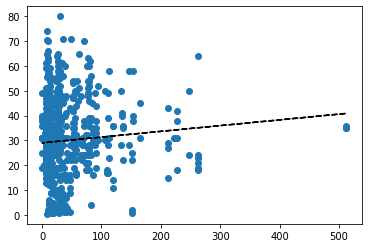

In [ ]:
#using amount paid to predict Age
predictors = ['Fare']
target = 'Age'
X = train[predictors].values
y = train[target].values

reg2 = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
reg2.fit(X,y)
plt.scatter(X,y)
plt.plot(X,reg2.predict(X),linestyle='dashed',color = 'black')



The older passengers were more frugal whereas passengers who were in the middle age ranges paid a bit more.

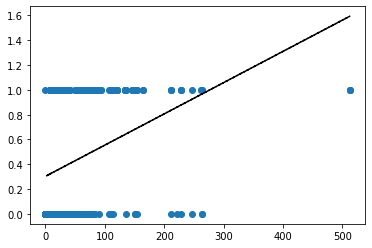

In [ ]:
#using amount paid to predict Survivability
predictors = ['Fare']
target = 'Survived'
X = train[predictors].values
y = train[target].values

reg3 = LinearRegression()
reg3.fit(X,y)
plt.scatter(X,y)
plt.plot(X,reg3.predict(X),linestyle='dashed',color = 'black')

[Text(111.60000000000001, 195.696, 'X[0] <= 1.415\ngini = 0.464\nsamples = 178\nvalue = [113, 65]'),
 Text(74.4, 152.208, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(148.8, 152.208, 'X[0] <= 30.5\ngini = 0.46\nsamples = 176\nvalue = [113, 63]'),
 Text(74.4, 108.72, 'X[0] <= 4.5\ngini = 0.485\nsamples = 87\nvalue = [51, 36]'),
 Text(37.2, 65.232, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(111.60000000000001, 65.232, 'X[0] <= 13.5\ngini = 0.49\nsamples = 84\nvalue = [48, 36]'),
 Text(74.4, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(148.8, 21.744, 'gini = 0.483\nsamples = 81\nvalue = [48, 33]'),
 Text(223.20000000000002, 108.72, 'X[0] <= 31.5\ngini = 0.423\nsamples = 89\nvalue = [62, 27]'),
 Text(186.0, 65.232, 'gini = 0.147\nsamples = 25\nvalue = [23, 2]'),
 Text(260.40000000000003, 65.232, 'X[0] <= 60.5\ngini = 0.476\nsamples = 64\nvalue = [39, 25]'),
 Text(223.20000000000002, 21.744, 'gini = 0.484\nsamples = 61\nvalue = [36, 25]'),
 Text(297.6, 21.744, 'gini

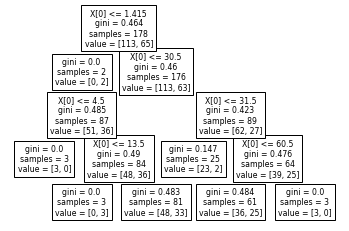

In [ ]:

predictors = ['Age']
target = 'Survived'
X = train[predictors].values
y = train[target].values
X_train ,X_test, y_train,y_test = train_test_split(X,y,test_size =.8,random_state = 42)
reg = DecisionTreeClassifier(max_depth=4)
reg.fit(X_train, y_train)
plot_tree(reg)
